# UNIVERSIDAD NACIONAL AUTONOMA DE MÉXICO

## Primer Parcial - Robótica

### Elaborado por Gerardo Santillán Sosa

## Contenido

1. Introducción.
2. Modelado cinemático de la postura del robot.
3. Modelado cinemático de las velocidades. 
4. Modelado cinemático de las aceleraciones.
5. El modelado dinámico. 
6. Conclusiones. 

## 1. Introducción

En este documento se desarrollan los modelos cinemáticos y dinámicos de un robot manipulador con el objetivo de describir su comportamiento en términos de posición, velocidad y aceleración, a partir de las variables articulares del robot. Cada modelo se utiliza para comprender cómo las articulaciones del robot afectan el movimiento y las fuerzas que actúan sobre él, y son fundamentales para aplicaciones de simulación, control y optimización de trayectorias.

El modelado cinemático permite calcular la postura del robot y cómo sus articulaciones se relacionan con el movimiento del efector final. Además, los modelos cinemáticos de las velocidades y aceleraciones son fundamentales para determinar cómo las velocidades articulares afectan las velocidades y aceleraciones del efector final. Por otro lado, el modelado dinámico describe la relación entre las fuerzas aplicadas y las aceleraciones articulares, lo cual es esencial para la planificación de movimientos en el espacio operativo del robot.

En los siguientes apartados se describirán detalladamente los modelos que se han desarrollado.

## 2. Modelado cinemático de la postura del robot.

Para describir la posición y orientación relativa entre eslabones consecutivos de un robot manipulador, se definió una función simbólica que genera una matriz de transformación homogénea 4x4. Esta matriz permite representar la rotación y traslación de un sistema de coordenadas 𝑖 respecto a otro sistema 𝑗. 
La función Tij se construyó usando las variables simbólicas x_ij  ,y_ij,z_ij (componentes de traslación), y los ángulos de Euler y_j (rotación sobre Z), B_j (rotación sobre Y) y a_j (rotación sobre X), que representan las rotaciones sucesivas del sistema 𝑖 al sistema 𝑗.


In [3]:
# Importar SymPy
import sympy as sp

# Definir las variables simbólicas
x_i_j, y_i_j, z_i_j, gi_j, bi_j, ai_j = sp.symbols('x_i_j y_i_j z_i_j gi_j bi_j ai_j')

# Definir la función Tij simbólica
Tij = sp.Matrix([
    [sp.cos(ai_j)*sp.cos(bi_j), sp.cos(ai_j)*sp.sin(bi_j)*sp.sin(gi_j)-sp.sin(ai_j)*sp.cos(gi_j), sp.sin(ai_j)*sp.sin(gi_j)+sp.cos(ai_j)*sp.sin(bi_j)*sp.cos(gi_j), x_i_j],
    [sp.sin(ai_j)*sp.cos(bi_j), sp.cos(ai_j)*sp.cos(gi_j)+sp.sin(ai_j)*sp.sin(bi_j)*sp.sin(gi_j), sp.sin(ai_j)*sp.sin(bi_j)*sp.cos(gi_j)-sp.cos(ai_j)*sp.sin(gi_j), y_i_j],
    [-sp.sin(bi_j), sp.cos(bi_j)*sp.sin(gi_j), sp.cos(bi_j)*sp.cos(gi_j), z_i_j],
    [0, 0, 0, 1]
])

# Mostrar la matriz resultante
Tij


Matrix([
[cos(ai_j)*cos(bi_j), -sin(ai_j)*cos(gi_j) + sin(bi_j)*sin(gi_j)*cos(ai_j), sin(ai_j)*sin(gi_j) + sin(bi_j)*cos(ai_j)*cos(gi_j), x_i_j],
[sin(ai_j)*cos(bi_j),  sin(ai_j)*sin(bi_j)*sin(gi_j) + cos(ai_j)*cos(gi_j), sin(ai_j)*sin(bi_j)*cos(gi_j) - sin(gi_j)*cos(ai_j), y_i_j],
[         -sin(bi_j),                                  sin(gi_j)*cos(bi_j),                                 cos(bi_j)*cos(gi_j), z_i_j],
[                  0,                                                    0,                                                   0,     1]])

Esta matriz representa la rotación compuesta mediante los tres ángulos y la traslación hacia un sistema de referencia desplazado y orientado con respecto al anterior. Es la base para calcular la cinemática directa del robot, ya que permite concatenar múltiples matrices T_i^(i+1) para obtener la posición del efector final respecto a la base.

## 2.1 Modelado Cinemático Directo de la Postura

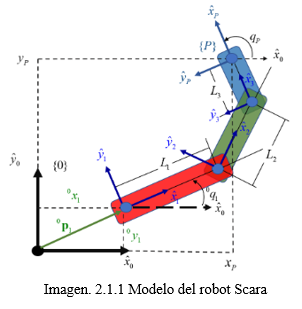

Para modelar la cinemática directa de este robot, se utilizó la multiplicación sucesiva de matrices de transformación homogénea que relacionan cada eslabón con el siguiente. La estructura del robot se describe por cuatro matrices 𝑇, que representan los cambios de coordenadas entre los distintos marcos de referencia.


- 	T_O1: Representa la posición y orientación del marco 1 respecto al sistema base 𝑂. En este caso, incluye una rotación alrededor del eje 𝑍 dada por θ_O1 y una traslación en 𝑥 y 𝑦. Es decir, la posición base del robot.

In [9]:
# Importar la librería SymPy
import sympy as sp

# Definir las variables simbólicas
x_O_1, y_O_1, theta_O_1, L_2, theta_1_2, L_3, theta_2_3, L_1 = sp.symbols('x_O_1 y_O_1 theta_O_1 L_2 theta_1_2 L_3 theta_2_3 L_1')

# Definir la matriz Tij con las variables específicas
T_O_1 = Tij(x_O_1, y_O_1, 0, 0, 0, theta_O_1)

# Mostrar la matriz resultante
T_O_1


Matrix([
[cos(theta_O_1), -sin(theta_O_1), 0, x_O_1],
[sin(theta_O_1),  cos(theta_O_1), 0, y_O_1],
[             0,               0, 1,     0],
[             0,               0, 0,     1]])

- 	T_12: Corresponde a una rotación θ_12 alrededor del eje Z, y una traslación a lo largo del eje x de magnitud L_1.

In [8]:
# Importar la librería SymPy
import sympy as sp

# Definir las variables simbólicas
L_1, theta_1_2 = sp.symbols('L_1 theta_1_2')

# Calcular la matriz T_1_2 con las variables específicas
T_1_2 = Tij(L_1, 0, 0, 0, 0, theta_1_2)

# Mostrar la matriz resultante
T_1_2


Matrix([
[cos(theta_1_2), -sin(theta_1_2), 0, L_1],
[sin(theta_1_2),  cos(theta_1_2), 0,   0],
[             0,               0, 1,   0],
[             0,               0, 0,   1]])

- 	T_23: De manera similar, describe una rotación θ_23 alrededor del eje Z y una traslación de L_2 en el eje x. 

In [7]:
# Definir la matriz Tij para la transformación homogénea
T_2_3 = Tij(L_2, 0, 0, 0, 0, theta_2_3)

# Mostrar la matriz resultante
T_2_3


Matrix([
[cos(theta_2_3), -sin(theta_2_3), 0, L_2],
[sin(theta_2_3),  cos(theta_2_3), 0,   0],
[             0,               0, 1,   0],
[             0,               0, 0,   1]])

-	T_3P: Representa una traslación L_3 desde el tercer eslabón hasta el efector final, sin rotación adicional.

In [10]:
# Definir la matriz Tij para la transformación homogénea
T_3_P = Tij(L_3, 0, 0, 0, 0, 0)

# Mostrar la matriz resultante
T_3_P


Matrix([
[1, 0, 0, L_3],
[0, 1, 0,   0],
[0, 0, 1,   0],
[0, 0, 0,   1]])

## 2.2 Cálculo de la Transformación Total

La transformación total del sistema base 𝑂 hasta el efector final 𝑃, se obtiene al multiplicar sucesivamente todas las matrices anteriores, obteniendo la matriz T_0P:

In [12]:
# Importar SymPy
import sympy as sp

# Asegúrate de que 'simplify' esté disponible
T_O_P = sp.simplify(T_O_1 * T_1_2 * T_2_3 * T_3_P)

# Mostrar la matriz resultante
T_O_P



Matrix([
[cos(theta_1_2 + theta_2_3 + theta_O_1), -sin(theta_1_2 + theta_2_3 + theta_O_1), 0, L_1*cos(theta_O_1) + L_2*cos(theta_1_2 + theta_O_1) + L_3*cos(theta_1_2 + theta_2_3 + theta_O_1) + x_O_1],
[sin(theta_1_2 + theta_2_3 + theta_O_1),  cos(theta_1_2 + theta_2_3 + theta_O_1), 0, L_1*sin(theta_O_1) + L_2*sin(theta_1_2 + theta_O_1) + L_3*sin(theta_1_2 + theta_2_3 + theta_O_1) + y_O_1],
[                                     0,                                       0, 1,                                                                                                        0],
[                                     0,                                       0, 0,                                                                                                        1]])

La matriz T_0p representa la transformación homogénea total desde el sistema base del robot (𝑂) hasta el efector final (𝑃). Esta matriz contiene tanto la orientación como la posición del efector expresadas en coordenadas del sistema base.
En la matriz anterior,los términos sin⁡(θ_1,2+θ_2,3+θ_0,1) y cos⁡(θ_1,2+θ_2,3+θ_0,1)  corresponden respectivamente al seno y coseno de la suma de los tres ángulos articulares. Estos términos definen la orientación del efector final.

La tercera columna de la matriz indica que el robot trabaja en el plano XY (sistema plano), y la cuarta columna contiene la posición 𝑥 y 𝑦 del efector. En ella se observa cómo se combinan las longitudes de los eslabones (L_1,L_2,L_3) y las rotaciones acumuladas para determinar la ubicación exacta del efector en el espacio.
Esta forma de la matriz es el resultado final del modelo cinemático directo de la postura, y permite ubicar el efector final en función de los ángulos articulares y la configuración física del robot.


## 2.3 Vector de postura del robot



Luego de calcular la transformación total T_0P mediante la multiplicación sucesiva de las matrices homogéneas de cada eslabón, se extrae del resultado la posición y orientación del efector final. Esta información se resume en el vector de postura ξ_0^P, como se muestra a continuación:

In [13]:
# Definir el vector xi_O_P usando los elementos de la matriz T_O_P
xi_O_P = sp.Matrix([T_O_P[0, 3], T_O_P[1, 3], theta_O_1 + theta_1_2 + theta_2_3])

# Mostrar el vector xi_O_P
xi_O_P


Matrix([
[L_1*cos(theta_O_1) + L_2*cos(theta_1_2 + theta_O_1) + L_3*cos(theta_1_2 + theta_2_3 + theta_O_1) + x_O_1],
[L_1*sin(theta_O_1) + L_2*sin(theta_1_2 + theta_O_1) + L_3*sin(theta_1_2 + theta_2_3 + theta_O_1) + y_O_1],
[                                                                       theta_1_2 + theta_2_3 + theta_O_1]])

- El primer componente representa la posición en x, donde x_0,1 representa la posición horizontal del origen del primer eslabón, y Lcos(θ) de cada termino, representa la proyección en X del avance de cada eslabón.
- El segundo componente representa la posición en y, donde y_0,1 representa la posición vertical del origen del primer eslabón y los términos con Lsen(θ), representa el avance en Y a lo largo del ángulo compuesto.
- El tercer componente es la orientación total del efector, donde está la suma de los tres ángulos articulares que definen la rotación acumulada del efector final respecto a la base.


## 2.4 Cinemática Inversa de la Postura

La cinemática inversa de la postura tiene como objetivo determinar los valores de los ángulos articulares necesarios para que el efector final alcance una posición (x_d,y_d)y una orientación deseada ∅_d. 
Para el caso de un robot SCARA de tres grados de libertad rotacionales, y bajo la suposición de que el origen del robot está en (0,0) y que el efector se encuentra en el plano XY, el modelo cinemático inverso puede obtenerse aplicando leyes trigonométricas.

Los pasos generales para obtener la cinemática inversa de la postura son:


 
1.	Calcular la distancia radial al punto deseado:


$r = \sqrt{x_d^2 + y_d^2}$

2. Calcular el segundo ángulo articular (θ_2) usando la ley del coseno:

$\theta_2 = \arccos{\left(\frac{r^2 - L_1^2 - L_2^2}{2 L_1 L_2}\right)}$


3. Calcular el primer ángulo articular (θ_1):

$\theta_1 = \arctan{\left(\frac{y_d}{x_d}\right)} - \arctan{\left(\frac{L_2 \sin(\theta_2)}{L_1 + L_2 \cos(\theta_2)}\right)}$


4. Finalmente, el tercer ángulo se obtiene como:

$\theta_3 = \theta_3 - \theta_2 - \theta_1$

## 3. Modelado cinemático de las velocidades. 
### 3.1 Cinemática Directa de las Velocidades
Una vez obtenido el vector de postura ξ_0^P, se procede a calcular la relación entre las velocidades articulares y la velocidad del efector final utilizando el Jacobiano. Este mapea la velocidad angular de las articulaciones hacia la velocidad lineal y angular del efector.
Se define la matriz Jacobiana como la derivada del vector de postura respecto a los ángulos articulares, como resultado obtenemos la matriz J(θ), mostrada en la imagen 3.1.1, dicha matriz que permite relacionar la velocidad de las articulaciones con la velocidad del efector final de acuerdo con:


### Matriz Jacobiana

La relación entre la velocidad de las articulaciones y la velocidad del efector final está dada por la fórmula del Jacobiano, como sigue:

$$
\dot{\xi}_0^P = J(\theta) \cdot \dot{\theta}
$$

Donde:
- $\dot{\xi}_0^P$ es el vector de velocidades del efector final (en $x$, $y$ y orientación).
- $\dot{\theta}$ es el vector de velocidades articulares.

In [14]:
# Importar la librería SymPy
import sympy as sp

# Definir las variables simbólicas
x_O_1, y_O_1, theta_O_1, L_2, theta_1_2, L_3, theta_2_3, L_1 = sp.symbols('x_O_1 y_O_1 theta_O_1 L_2 theta_1_2 L_3 theta_2_3 L_1')

# Definir el vector de postura xi_O_P (ya definido previamente)
xi_O_P = sp.Matrix([T_O_P[0, 3], T_O_P[1, 3], theta_O_1 + theta_1_2 + theta_2_3])

# Calcular la matriz Jacobiana
J_theta = sp.Matrix([[sp.diff(xi_O_P[i], var) for var in [theta_O_1, theta_1_2, theta_2_3]] for i in range(len(xi_O_P))])

# Mostrar la matriz Jacobiana
J_theta


Matrix([
[-L_1*sin(theta_O_1) - L_2*sin(theta_1_2 + theta_O_1) - L_3*sin(theta_1_2 + theta_2_3 + theta_O_1), -L_2*sin(theta_1_2 + theta_O_1) - L_3*sin(theta_1_2 + theta_2_3 + theta_O_1), -L_3*sin(theta_1_2 + theta_2_3 + theta_O_1)],
[ L_1*cos(theta_O_1) + L_2*cos(theta_1_2 + theta_O_1) + L_3*cos(theta_1_2 + theta_2_3 + theta_O_1),  L_2*cos(theta_1_2 + theta_O_1) + L_3*cos(theta_1_2 + theta_2_3 + theta_O_1),  L_3*cos(theta_1_2 + theta_2_3 + theta_O_1)],
[                                                                                                1,                                                                            1,                                           1]])

### 3.2 Cinemática Inversa de las Velocidades

Para calcular las velocidades articulares necesarias para generar una velocidad deseada del efector final, se obtiene la inversa del Jacobiano, el cual se puede representar por:

$$
\dot{\theta} = J^{-1}(\theta) \cdot \dot{\xi}_0^P
$$

Donde:
- $\dot{\xi}_0^P$ es el vector de velocidades del efector final (en $x$, $y$ y orientación).
- $\dot{\theta}$ es el vector de velocidades articulares.

Este modelo es fundamental para el control del robot, ya que permite traducir trayectorias deseadas del efector en comandos para los motores de las articulaciones.

Para realizar el cálculo en Matlab, simplemente realizamos la inversa de la matriz jacobiana, dándonos como resultado la siguiente matriz:


In [19]:
# Calcular la inversa de la matriz Jacobiana
J_inv = J_theta.inv()

# Mostrar la matriz inversa
J_inv




Matrix([
[                                    cos(theta_1_2 + theta_O_1)/(-L_1*sin(theta_O_1)*cos(theta_1_2 + theta_O_1) + L_1*sin(theta_1_2 + theta_O_1)*cos(theta_O_1)),                                     sin(theta_1_2 + theta_O_1)/(-L_1*sin(theta_O_1)*cos(theta_1_2 + theta_O_1) + L_1*sin(theta_1_2 + theta_O_1)*cos(theta_O_1)),                                                                                                                                                (-L_3*sin(theta_1_2 + theta_O_1)*cos(theta_1_2 + theta_2_3 + theta_O_1) + L_3*sin(theta_1_2 + theta_2_3 + theta_O_1)*cos(theta_1_2 + theta_O_1))/(-L_1*sin(theta_O_1)*cos(theta_1_2 + theta_O_1) + L_1*sin(theta_1_2 + theta_O_1)*cos(theta_O_1))],
[(-L_1*cos(theta_O_1) - L_2*cos(theta_1_2 + theta_O_1))/(-L_1*L_2*sin(theta_O_1)*cos(theta_1_2 + theta_O_1) + L_1*L_2*sin(theta_1_2 + theta_O_1)*cos(theta_O_1)), (-L_1*sin(theta_O_1) - L_2*sin(theta_1_2 + theta_O_1))/(-L_1*L_2*sin(theta_O_1)*cos(theta_1_2 + theta_O_1) + L_1*L_2*si

La matriz anterior presenta el resultado del modelo de cinemática inversa de las velocidades, en el cual se calcula el vector de velocidades articulares a partir de una velocidad deseada del efector final. Las expresiones resultantes son funciones racionales que dependen de los ángulos articulares y longitudes de los eslabones. Este modelo permite traducir movimientos deseados en el espacio cartesiano a comandos de velocidad en el espacio articular.

### 4. Modelado cinemático de las aceleraciones.

En esta sección se desarrolla el modelo cinemático de las aceleraciones del robot manipulador, tanto en su forma directa como inversa. Este modelo permite calcular la aceleración lineal y angular del efector a partir de las aceleraciones articulares, o bien estimar las aceleraciones articulares necesarias para alcanzar una aceleración deseada en el espacio cartesiano. Este análisis es clave para tareas de control dinámico y simulación avanzada.

### 4.1 Modelo cinemático directo de las aceleraciones.

El modelo cinemático directo de las aceleraciones permite calcular la aceleración lineal y angular del efector final del robot a partir de las aceleraciones articulares y las velocidades articulares actuales. Este modelo se basa en la derivada total del modelo de velocidades, e incluye tanto el efecto directo de las aceleraciones articulares como el efecto de las velocidades en la variación del Jacobiano.

Se basa en la expresión general:

$$
\ddot{x} = J(\theta) \dot{\theta} + j(\theta, \dot{\theta}) \dot{\theta}
$$

Donde:
- $J(\theta)$ es el Jacobiano del sistema.
- $j$ es la derivada temporal.

A continuación, se realizaron los cálculos con ayuda de Matlab, para obtener el modelo cinemático directo de las aceleraciones:


1.	Definición simbólica de variables: Se declaran variables simbólicas para los ángulos articulares, sus derivadas primeras (velocidades angulares) y segundas (aceleraciones), así como las constantes geométricas del robot (longitudes de los eslabones). Esto permite trabajar algebraicamente con las expresiones del modelo.

In [20]:
# Importar SymPy
import sympy as sp

# Paso 1 - Definir variables simbólicas
theta_O_1, theta_1_2, theta_2_3 = sp.symbols('theta_O_1 theta_1_2 theta_2_3')
theta_dot_O_1, theta_dot_1_2, theta_dot_2_3 = sp.symbols('theta_dot_O_1 theta_dot_1_2 theta_dot_2_3')
theta_ddot_O_1, theta_ddot_1_2, theta_ddot_2_3 = sp.symbols('theta_ddot_O_1 theta_ddot_1_2 theta_ddot_2_3')
L1, L2, L3, x_O_1, y_O_1 = sp.symbols('L1 L2 L3 x_O_1 y_O_1')

# Vector de articulaciones
theta = sp.Matrix([theta_O_1, theta_1_2, theta_2_3])
theta_dot = sp.Matrix([theta_dot_O_1, theta_dot_1_2, theta_dot_2_3])
theta_ddot = sp.Matrix([theta_ddot_O_1, theta_ddot_1_2, theta_ddot_2_3])

# Mostrar contenido de las variables
print('Vector theta:')
display(theta)

print('Vector theta_dot:')
display(theta_dot)

print('Vector theta_ddot:')
display(theta_ddot)


Vector theta:


Matrix([
[theta_O_1],
[theta_1_2],
[theta_2_3]])

Vector theta_dot:


Matrix([
[theta_dot_O_1],
[theta_dot_1_2],
[theta_dot_2_3]])

Vector theta_ddot:


Matrix([
[theta_ddot_O_1],
[theta_ddot_1_2],
[theta_ddot_2_3]])

2. Definición del vector de postura del efector: Se formula el vector ξ_0^P que describe la posición y orientación del efector en función de los ángulos articulares, reutilizando el modelo cinemático directo ya desarrollado anteriormente.

In [21]:
# Definir las variables simbólicas
x_O_1, y_O_1, theta_O_1, theta_1_2, theta_2_3, L1, L2, L3 = sp.symbols('x_O_1 y_O_1 theta_O_1 theta_1_2 theta_2_3 L1 L2 L3')

# Calcular el vector de postura del efector
xi_O_P = sp.Matrix([
    x_O_1 + L2 * sp.cos(theta_1_2 + theta_O_1) + L1 * sp.cos(theta_O_1) + L3 * sp.cos(theta_1_2 + theta_2_3 + theta_O_1),
    y_O_1 + L2 * sp.sin(theta_1_2 + theta_O_1) + L1 * sp.sin(theta_O_1) + L3 * sp.sin(theta_1_2 + theta_2_3 + theta_O_1),
    theta_O_1 + theta_1_2 + theta_2_3
])

# Mostrar el vector de postura xi_O_P
xi_O_P


Matrix([
[L1*cos(theta_O_1) + L2*cos(theta_1_2 + theta_O_1) + L3*cos(theta_1_2 + theta_2_3 + theta_O_1) + x_O_1],
[L1*sin(theta_O_1) + L2*sin(theta_1_2 + theta_O_1) + L3*sin(theta_1_2 + theta_2_3 + theta_O_1) + y_O_1],
[                                                                    theta_1_2 + theta_2_3 + theta_O_1]])

3.	Cálculo del Jacobiano J(θ): Se calcula la matriz Jacobiana mediante la derivada del vector de postura respecto a las variables articulares. Esta matriz relaciona las velocidades articulares con las velocidades lineales del efector.

In [36]:
# Calcular el Jacobiano J_theta
J_theta = sp.Matrix([
    [sp.diff(xi_O_P[0], theta_O_1), sp.diff(xi_O_P[0], theta_1_2), sp.diff(xi_O_P[0], theta_2_3)],
    [sp.diff(xi_O_P[1], theta_O_1), sp.diff(xi_O_P[1], theta_1_2), sp.diff(xi_O_P[1], theta_2_3)],
    [sp.diff(xi_O_P[2], theta_O_1), sp.diff(xi_O_P[2], theta_1_2), sp.diff(xi_O_P[2], theta_2_3)],
])

# Mostrar el Jacobiano J_theta
J_theta



Matrix([
[-L1*sin(theta_O_1) - L2*sin(theta_1_2 + theta_O_1) - L3*sin(theta_1_2 + theta_2_3 + theta_O_1), -L2*sin(theta_1_2 + theta_O_1) - L3*sin(theta_1_2 + theta_2_3 + theta_O_1), -L3*sin(theta_1_2 + theta_2_3 + theta_O_1)],
[ L1*cos(theta_O_1) + L2*cos(theta_1_2 + theta_O_1) + L3*cos(theta_1_2 + theta_2_3 + theta_O_1),  L2*cos(theta_1_2 + theta_O_1) + L3*cos(theta_1_2 + theta_2_3 + theta_O_1),  L3*cos(theta_1_2 + theta_2_3 + theta_O_1)],
[                                                                                             1,                                                                          1,                                          1]])

4.	Derivada temporal del Jacobiano 𝐽: Para obtener el modelo de aceleraciones, se requiere derivar el Jacobiano respecto al tiempo. Esto se logra sustituyendo las variables articulares por funciones dependientes del tiempo 𝜃(𝑡), aplicando la derivada simbólica y luego reemplazando las derivadas por las variables de velocidad angular originales, lo cual se muestra en la siguiente imagen, donde se muestran los cálculos en Matlab.

In [42]:
# Paso 6 - Derivar con respecto al tiempo

# Inicializar una lista para almacenar las derivadas
J_dot_list = []

# Derivar cada componente de la matriz Jacobiana
for i in range(J_theta.shape[0]):
    row = []
    for j in range(J_theta.shape[1]):
        row.append(sp.diff(J_theta[i, j], t))
    J_dot_list.append(row)

# Convertir la lista a una matriz de SymPy
J_dot = sp.Matrix(J_dot_list)

# Sustituir derivadas de theta por símbolos explícitos de velocidad
J_dot = J_dot.subs({sp.diff(theta_t0, t): theta_dot_t0, sp.diff(theta_t1, t): theta_dot_t1, sp.diff(theta_t2, t): theta_dot_t2})

# Mostrar la derivada temporal del Jacobiano J_dot
J_dot


Matrix([
[theta_dot_t2, theta_dot_t2, theta_dot_t2],
[theta_dot_t2, theta_dot_t2, theta_dot_t2],
[theta_dot_t2, theta_dot_t2, theta_dot_t2]])

5. Modelo cinemático directo de aceleraciones: Se aplica directamente la fórmula        x ̈=Jθ ̈+J ̇θ ̇ para obtener una expresión general que relaciona las aceleraciones articulares con la aceleración del efector, dándonos como resultado la siguiente matriz.

In [43]:
# Calcular el modelo cinemático directo de las aceleraciones
x_ddot = sp.simplify(J_theta * sp.Matrix([theta_ddot_O_1, theta_ddot_1_2, theta_ddot_2_3]) + J_dot * sp.Matrix([theta_dot_O_1, theta_dot_1_2, theta_dot_2_3]))

# Mostrar el modelo resultante
x_ddot


Matrix([
[-L3*theta_ddot_2_3*sin(theta_t0 + theta_t1 + theta_t2) - theta_ddot_1_2*(L2*sin(theta_t0 + theta_t1) + L3*sin(theta_t0 + theta_t1 + theta_t2)) - theta_ddot_O_1*(L1*sin(theta_t0) + L2*sin(theta_t0 + theta_t1) + L3*sin(theta_t0 + theta_t1 + theta_t2)) + theta_dot_1_2*theta_dot_t2 + theta_dot_2_3*theta_dot_t2 + theta_dot_O_1*theta_dot_t2],
[ L3*theta_ddot_2_3*cos(theta_t0 + theta_t1 + theta_t2) + theta_ddot_1_2*(L2*cos(theta_t0 + theta_t1) + L3*cos(theta_t0 + theta_t1 + theta_t2)) + theta_ddot_O_1*(L1*cos(theta_t0) + L2*cos(theta_t0 + theta_t1) + L3*cos(theta_t0 + theta_t1 + theta_t2)) + theta_dot_1_2*theta_dot_t2 + theta_dot_2_3*theta_dot_t2 + theta_dot_O_1*theta_dot_t2],
[                                                                                                                                                                                                         theta_ddot_1_2 + theta_ddot_2_3 + theta_ddot_O_1 + theta_dot_1_2*theta_dot_t2 + theta_dot_2_3*theta_dot_t2 + 

## 4.2 Modelo cinemático inverso de las aceleraciones
El modelo cinemático inverso de las aceleraciones tiene como objetivo encontrar las aceleraciones articulares que debe tener el robot para que su efector final siga una aceleración deseada en el espacio cartesiano. Se obtiene al despejar θ ̈ a partir del modelo directo, utilizando la pseudo-inversa del Jacobiano para aplicar un control desde el espacio operacional hacia el espacio articular.
Se realizarán los mismos pasos que en el desarrollo del modelo directo, ya que es necesario contar con el vector de postura, el Jacobiano y su derivada temporal. Sin embargo, lo que cambia es el objetivo del análisis: mientras que el modelo directo calcula la aceleración del efector a partir de las aceleraciones articulares, en el modelo inverso se busca estimar las aceleraciones articulares necesarias para lograr una aceleración deseada del efector en el espacio cartesiano.

Se basa en la expresión general:

$$
\ddot{\theta} = J^{+} (\ddot{x}_d - J \dot{\theta})
$$

Donde (x_d ) ̈ es la aceleración deseada del efector y J^+ representa la pseudo-inversa del Jacobiano. Esta ecuación permite invertir el modelo directo para planear o controlar trayectorias en el espacio cartesiano a partir de comandos de aceleración.

In [ ]:
# Paso 6 - Modelo cinemático inverso de aceleraciones
import sympy as sp

# Definir las variables simbólicas
x_ddot_1, x_ddot_2, x_ddot_3 = sp.symbols('x_ddot_1 x_ddot_2 x_ddot_3')

# Crear el vector de aceleraciones deseadas
x_ddot_d = sp.Matrix([x_ddot_1, x_ddot_2, x_ddot_3])

# Resolver el modelo cinemático inverso de aceleraciones utilizando la pseudoinversa
theta_ddot_sol = sp.simplify(J_theta.pinv() * (x_ddot_d - J_dot * sp.Matrix([theta_dot_O_1, theta_dot_1_2, theta_dot_2_3])))

# Mostrar el resultado
theta_ddot_sol



## 5.  Modelo dinámico directo

## 5.1 Modelo Dinámico por Ecuaciones de Euler-Lagrange

**Definición de la energía cinética:**

La energía cinética se calcula a partir de las velocidades de los cuerpos del robot y su momento de inercia. Para un cuerpo en el sistema, la energía cinética se calcula usando la fórmula:

$$
K = \frac{1}{2} m v^2 + \frac{1}{2} \omega^T I \omega
$$

donde $m$ es la masa, $v$ es la velocidad del centro de masa, y $\omega$ es la velocidad angular, mientras que $I$ es el tensor de inercia.

La energía cinética es fundamental para el modelo dinámico porque describe cómo los movimientos de las partes del robot afectan su comportamiento. La ecuación de Euler-Lagrange requiere conocer la energía cinética para poder derivar las ecuaciones de movimiento del sistema, que describen cómo se moverán las articulaciones en función de las fuerzas aplicadas.

Estas ecuaciones, al ser derivadas de la energía cinética y la potencial, nos permiten obtener los pares actuantes o las fuerzas necesarias para que el robot se mueva de manera controlada. Es decir, saber cómo cada parte del robot contribuye al movimiento global es esencial para diseñar un controlador eficiente.


Calcularemos las velocidades lineales y sus productos punto, los cuales son necesarios para determinar la energía cinética de los componentes del robot.

- **Velocidad en el sistema**

Se calcula la velocidad lineal de un punto C1 en el sistema del cuerpo C1. Esta velocidad está asociada con el movimiento en la dirección 𝑦, debido a la rotación del cuerpo alrededor del eje 𝑧, con una componente cero en las direcciones 𝑥 y 𝑧.

In [4]:
import sympy as sp

# Definimos las variables
x_1_C1, theta_dot_O_1 = sp.symbols('x_1_C1 theta_dot_O_1')

# Velocidad
v_C1_C1 = sp.Matrix([0, x_1_C1 * theta_dot_O_1, 0])


v_C1_C1

Matrix([
[                   0],
[theta_dot_O_1*x_1_C1],
[                   0]])

- **Cálculo de la velocidad en el sistema global 𝑂**

Se calcula la velocidad lineal del punto 𝐶1 en el sistema global 𝑂, considerando la distancia x_1_c1 y la velocidad angular 𝜃_𝑂_1. La componente en 𝑥 se calcula con el seno de 𝜃_𝑂_1 y la componente en 𝑦 con el coseno de 𝜃_𝑂_1, mientras que la componente en 𝑧 es cero.

In [7]:
# Calcular la velocidad en el sistema global O
v_O_C1 = sp.Matrix([-x_1_C1 * sp.sin(theta_O_1) * theta_dot_O_1, 
                    x_1_C1 * sp.cos(theta_O_1) * theta_dot_O_1, 0])

v_O_C1

Matrix([
[-theta_dot_O_1*x_1_C1*sin(theta_O_1)],
[ theta_dot_O_1*x_1_C1*cos(theta_O_1)],
[                                   0]])

- **Producto punto de 𝑣_C1 consigo misma**

Esta operación calcula el producto punto de la velocidad de 𝐶1 consigo misma, lo que nos da el cuadrado de la magnitud de la velocidad en el sistema 𝐶1. Esto es útil para calcular la energía cinética translacional del sistema.

In [9]:
# Calcular el producto punto de v_C1_C1 consigo misma
v_C1_C1_dot = v_C1_C1.transpose() * v_C1_C1
v_C1_C1_dot



Matrix([[theta_dot_O_1**2*x_1_C1**2]])

- **Producto punto de v_O_C1 consigo misma y simplificación**

Aquí se calcula el producto punto de la velocidad del centro de masa 𝐶1 en el sistema global 𝑂 consigo misma. Luego, se simplifica la expresión, lo cual nos da el cuadrado de la magnitud de la velocidad en el sistema global. Esta operación es parte del cálculo de la energía cinética rotacional del sistema.

In [10]:
# Simplificar el producto punto de v_O_C1 consigo misma
v_O_C1_dot_simplified = sp.simplify(v_O_C1.transpose() * v_O_C1)
v_O_C1_dot_simplified


Matrix([[theta_dot_O_1**2*x_1_C1**2]])

## 5.2 Cálculo de la posición de los centros de masa

En esta sección, se calcula la posición de los centros de masa de los componentes del robot, lo cual es crucial para determinar la distribución de la masa y, en consecuencia, la energía cinética total del sistema. La posición de cada centro de masa se obtiene mediante transformaciones homogéneas, que describen la relación espacial entre las diferentes partes del robot y su sistema de referencia global.

Se utilizan las matrices de transformación homogénea para cada eslabón del robot, considerando las longitudes y los ángulos de las articulaciones. Estas matrices nos permiten calcular la posición de los centros de masa en función de las coordenadas globales, lo que es esencial para los siguientes pasos en el análisis dinámico.

A continuación, se calculan las posiciones de los centros de masa para los diferentes componentes C1, C2 y C3, teniendo en cuenta las transformaciones desde el sistema de referencia de cada componente hasta el sistema global.

- **Cálculo de la transformación para el centro de masa de C1 C2 y C3**

Calcularemos las posiciones globales de los centros de masa de los componentes 𝐶1, 𝐶2 y 𝐶3 del robot mediante una serie de transformaciones homogéneas. Estas transformaciones describen la relación espacial entre cada centro de masa y el sistema de referencia global, lo cual es esencial para determinar las posiciones relativas de las partes del robot en el espacio. En el proceso, se calcularan matrices de transformación para cada componente usando los parámetros de traslación y rotación, y luego se multiplicaran estas matrices para obtener las posiciones globales de los centros de masa.

In [60]:
import sympy as sp

# Definir las variables simbólicas
x_1_C1, x_2_C2, x_3_C3, theta_O_1, theta_1_2, theta_2_3 = sp.symbols('x_1_C1 x_2_C2 x_3_C3 theta_O_1 theta_1_2 theta_2_3')

# Inicializar la impresión bonita
sp.init_printing()

# Definir la matriz de transformación homogénea Tij
def Tij(x, y, z, g, b, a):
    return sp.Matrix([[sp.cos(a)*sp.cos(b), sp.cos(a)*sp.sin(b)*sp.sin(g)-sp.sin(a)*sp.cos(g), sp.sin(a)*sp.sin(g)+sp.cos(a)*sp.sin(b)*sp.cos(g), x],
                      [sp.sin(a)*sp.cos(b), sp.cos(a)*sp.cos(g)+sp.sin(a)*sp.sin(b)*sp.sin(g), sp.sin(a)*sp.sin(b)*sp.cos(g)-sp.cos(a)*sp.sin(g), y],
                      [-sp.sin(b), sp.cos(b)*sp.sin(g), sp.cos(b)*sp.cos(g), z],
                      [0, 0, 0, 1]])

# Definir las matrices de transformación para T_O_1
T_O_1 = sp.Matrix([[sp.cos(theta_O_1), -sp.sin(theta_O_1), 0, 0],
                   [sp.sin(theta_O_1), sp.cos(theta_O_1), 0, 0],
                   [0, 0, 1, 0],
                   [0, 0, 0, 1]])

# Transformación homogénea para el centro de masa de C1
T_1_C1 = Tij(x_1_C1, 0, 0, 0, 0, 0)

# Multiplicación de matrices para obtener T_O_C1
T_O_C1 = T_O_1 * T_1_C1

# Transformación homogénea para el centro de masa de C2
T_2_C2 = Tij(x_2_C2, 0, 0, 0, 0, 0)

# Multiplicación de matrices para obtener T_O_C2 (considerando T_1_2)
T_1_2 = sp.Matrix([[sp.cos(theta_1_2), -sp.sin(theta_1_2), 0, 0],
                   [sp.sin(theta_1_2), sp.cos(theta_1_2), 0, 0],
                   [0, 0, 1, 0],
                   [0, 0, 0, 1]])
T_O_C2 = T_O_1 * T_1_2 * T_2_C2

# Transformación homogénea para el centro de masa de C3
T_3_C3 = Tij(x_3_C3, 0, 0, 0, 0, 0)

# Multiplicación de matrices para obtener T_O_C3 (considerando T_1_2 y T_2_3)
T_2_3 = sp.Matrix([[sp.cos(theta_2_3), -sp.sin(theta_2_3), 0, 0],
                   [sp.sin(theta_2_3), sp.cos(theta_2_3), 0, 0],
                   [0, 0, 1, 0],
                   [0, 0, 0, 1]])
T_O_C3 = T_O_1 * T_1_2 * T_2_3 * T_3_C3
print('T_1_C1=              T_2_C2=            T_3_C3=')
# Mostrar las matrices
T_1_C1, T_2_C2, T_3_C3


T_1_C1=              T_2_C2=            T_3_C3=


⎛⎡1  0  0  x_1_C1⎤  ⎡1  0  0  x_2_C2⎤  ⎡1  0  0  x_3_C3⎤⎞
⎜⎢               ⎥  ⎢               ⎥  ⎢               ⎥⎟
⎜⎢0  1  0    0   ⎥  ⎢0  1  0    0   ⎥  ⎢0  1  0    0   ⎥⎟
⎜⎢               ⎥, ⎢               ⎥, ⎢               ⎥⎟
⎜⎢0  0  1    0   ⎥  ⎢0  0  1    0   ⎥  ⎢0  0  1    0   ⎥⎟
⎜⎢               ⎥  ⎢               ⎥  ⎢               ⎥⎟
⎝⎣0  0  0    1   ⎦  ⎣0  0  0    1   ⎦  ⎣0  0  0    1   ⎦⎠

In [55]:
print('T_O_C1=, T_O_C2=, T_O_C3=')
T_O_C1, T_O_C2, T_O_C3

T_O_C1=, T_O_C2=, T_O_C3=


⎛⎡cos(θ_O_1)  -sin(θ_O_1)  0  x_1_C1⋅cos(θ_O_1)⎤  ⎡-sin(θ₁ ₂)⋅sin(θ_O_1) + cos ↪
⎜⎢                                             ⎥  ⎢                            ↪
⎜⎢sin(θ_O_1)  cos(θ_O_1)   0  x_1_C1⋅sin(θ_O_1)⎥  ⎢sin(θ₁ ₂)⋅cos(θ_O_1) + sin( ↪
⎜⎢                                             ⎥, ⎢                            ↪
⎜⎢    0            0       1          0        ⎥  ⎢                     0      ↪
⎜⎢                                             ⎥  ⎢                            ↪
⎝⎣    0            0       0          1        ⎦  ⎣                     0      ↪

↪ (θ₁ ₂)⋅cos(θ_O_1)  -sin(θ₁ ₂)⋅cos(θ_O_1) - sin(θ_O_1)⋅cos(θ₁ ₂)  0  x_2_C2⋅( ↪
↪                                                                              ↪
↪ θ_O_1)⋅cos(θ₁ ₂)   -sin(θ₁ ₂)⋅sin(θ_O_1) + cos(θ₁ ₂)⋅cos(θ_O_1)  0  x_2_C2⋅( ↪
↪                                                                              ↪
↪                                         0                        1           ↪
↪                          

El análisis de las matrices resultantes muestra cómo las componentes de traslación y rotación afectan la posición global de cada centro de masa: las posiciones globales dependen de las transformaciones entre los distintos eslabones del robot, lo que se refleja en los valores de las matrices. Las matrices resultantes, como T_O_C1, T_O_C2, y T_O_C3, incluyen tanto las componentes de rotación como de traslación, lo que proporciona una representación completa de la ubicación de los centros de masa en el sistema global, lo cual es crucial para los cálculos posteriores de la dinámica y la energía del robot.


- **Vectores de posición**

Calculamos los vectores de posición de los centros de masa de los componentes 𝐶1, 𝐶2 y 𝐶3. Los vectores de posición se construyen tomando las componentes de traslación 𝑥, 𝑦, y 𝑧 de las matrices de transformación homogénea T_O_C1, T_O_C2, y T_O_C3, las cuales representan las posiciones de estos centros de masa en el sistema de referencia global. Además, para 𝐶2 y 𝐶3, se utiliza la función de simplificación para obtener expresiones más manejables.



In [5]:
import sympy as sp

# Definir las variables simbólicas
x_0_1, x_1_C1, x_2_C2, x_3_C3, L1, L2, L3, y_0_1, theta_O_1, theta_1_2, theta_2_3 = sp.symbols('x_0_1 x_1_C1 x_2_C2 x_3_C3 L1 L2 L3 y_0_1 theta_O_1 theta_1_2 theta_2_3')

# Inicializar la impresión bonita
sp.init_printing()

# Definir la matriz de transformación homogénea Tij
def Tij(x, y, z, g, b, a):
    return sp.Matrix([[sp.cos(a)*sp.cos(b), sp.cos(a)*sp.sin(b)*sp.sin(g)-sp.sin(a)*sp.cos(g), sp.sin(a)*sp.sin(g)+sp.cos(a)*sp.sin(b)*sp.cos(g), x],
                      [sp.sin(a)*sp.cos(b), sp.cos(a)*sp.cos(g)+sp.sin(a)*sp.sin(b)*sp.sin(g), sp.sin(a)*sp.sin(b)*sp.cos(g)-sp.cos(a)*sp.sin(g), y],
                      [-sp.sin(b), sp.cos(b)*sp.sin(g), sp.cos(b)*sp.cos(g), z],
                      [0, 0, 0, 1]])

# Transformación homogénea para el centro de masa de C1
T_1_C1 = Tij(x_1_C1, 0, 0, 0, 0, 0)

# Multiplicación de matrices para obtener T_O_C1
T_O_1 = sp.Matrix([[sp.cos(theta_O_1), -sp.sin(theta_O_1), 0, 0],
                   [sp.sin(theta_O_1), sp.cos(theta_O_1), 0, 0],
                   [0, 0, 1, 0],
                   [0, 0, 0, 1]])

T_O_C1 = T_O_1 * T_1_C1

# Calcular el vector de posición para C1 (usando las posiciones de traslación)
p_O_C1 = sp.Matrix([x_0_1 + x_1_C1 * sp.cos(theta_O_1), 
                    y_0_1 + x_1_C1 * sp.sin(theta_O_1),  # Agregar y_0_1 en esta parte
                    0])

# Transformación homogénea para el centro de masa de C2
T_2_C2 = Tij(x_2_C2, 0, 0, 0, 0, 0)

# Multiplicación de matrices para obtener T_O_C2
T_1_2 = sp.Matrix([[sp.cos(theta_1_2), -sp.sin(theta_1_2), 0, 0],
                   [sp.sin(theta_1_2), sp.cos(theta_1_2), 0, 0],
                   [0, 0, 1, 0],
                   [0, 0, 0, 1]])

T_O_C2 = T_O_1 * T_1_2 * T_2_C2

# Calcular el vector de posición para C2
p_O_C2 = sp.simplify(sp.Matrix([x_0_1 + x_2_C2 * sp.cos(theta_1_2 + theta_O_1) + L1 * sp.cos(theta_O_1),
                               y_0_1 + x_2_C2 * sp.sin(theta_1_2 + theta_O_1) + L1 * sp.sin(theta_O_1),
                               0]))

# Transformación homogénea para el centro de masa de C3
T_3_C3 = Tij(x_3_C3, 0, 0, 0, 0, 0)

# Multiplicación de matrices para obtener T_O_C3
T_2_3 = sp.Matrix([[sp.cos(theta_2_3), -sp.sin(theta_2_3), 0, 0],
                   [sp.sin(theta_2_3), sp.cos(theta_2_3), 0, 0],
                   [0, 0, 1, 0],
                   [0, 0, 0, 1]])

T_O_C3 = T_O_1 * T_1_2 * T_2_3 * T_3_C3

# Calcular el vector de posición para C3
p_O_C3 = sp.simplify(sp.Matrix([x_0_1 + L2 * sp.cos(theta_1_2 + theta_O_1) + L1 * sp.cos(theta_O_1) + x_3_C3 * sp.cos(theta_1_2 + theta_2_3 + theta_O_1),
                               y_0_1 + x_3_C3 * sp.sin(theta_1_2 + theta_2_3 + theta_O_1) + L2 * sp.sin(theta_1_2 + theta_O_1) + L1 * sp.sin(theta_O_1),
                               0]))

# Mostrar los resultados
p_O_C1, p_O_C2, p_O_C3


⎛⎡x₀ ₁ + x_1_C1⋅cos(θ_O_1)⎤  ⎡L₁⋅cos(θ_O_1) + x₀ ₁ + x_2_C2⋅cos(θ₁ ₂ + θ_O_1)⎤ ↪
⎜⎢                        ⎥  ⎢                                               ⎥ ↪
⎜⎢x_1_C1⋅sin(θ_O_1) + y₀ ₁⎥, ⎢L₁⋅sin(θ_O_1) + x_2_C2⋅sin(θ₁ ₂ + θ_O_1) + y₀ ₁⎥ ↪
⎜⎢                        ⎥  ⎢                                               ⎥ ↪
⎝⎣           0            ⎦  ⎣                       0                       ⎦ ↪

↪   ⎡L₁⋅cos(θ_O_1) + L₂⋅cos(θ₁ ₂ + θ_O_1) + x₀ ₁ + x_3_C3⋅cos(θ₁ ₂ + θ₂ ₃ + θ_ ↪
↪   ⎢                                                                          ↪
↪ , ⎢L₁⋅sin(θ_O_1) + L₂⋅sin(θ₁ ₂ + θ_O_1) + x_3_C3⋅sin(θ₁ ₂ + θ₂ ₃ + θ_O_1) +  ↪
↪   ⎢                                                                          ↪
↪   ⎣                                      0                                   ↪

↪ O_1)⎤⎞
↪     ⎥⎟
↪ y₀ ₁⎥⎟
↪     ⎥⎟
↪     ⎦⎠

Los resultados muestran los vectores de posición para los centros de masa 𝐶1, 𝐶2, y 𝐶3 del robot, calculados a partir de las matrices de transformación homogénea. Para 𝐶1, se obtiene un vector de posición que depende de las traslaciones x_1 y y_1 , y el ángulo 𝜃_1, lo cual describe la posición de 𝐶1 en el sistema global. De manera similar, para 𝐶2 y 𝐶3, se incorporan los desplazamientos x_2, x_3 y las longitudes L_1, L_2 y L_3, así como los ángulos 𝜃_1, 𝜃_12, y 𝜃_23, lo que proporciona las posiciones globales de los centros de masa de estos componentes. Con estos cálculos, ya hemos obtenido las posiciones exactas de los centros de masa, lo cual es fundamental para los análisis de energía y dinámica del sistema.

## 5.3 Cálculo de las velocidades

Las velocidades de los centros de masa son necesarias para determinar la energía cinética del sistema. Para obtener las ecuaciones de movimiento mediante el principio de Lagrange, necesitamos las velocidades lineales y angulares de cada componente del robot. Estas velocidades se derivan de las posiciones de los centros de masa, considerando las transformaciones de las matrices de movimiento entre los eslabones del robot. Por lo tanto, procederemos a realizar los cálculos de las velocidades de cada centro de masa, utilizando la derivada temporal de las posiciones para obtener las velocidades lineales y, en caso necesario, las angulares. Las operaciones involucradas incluirán derivadas de las matrices de transformación, tomando en cuenta las velocidades articulares y las velocidades relativas entre eslabones. Con estas velocidades, podremos calcular la energía cinética, que es esencial para formular las ecuaciones que describen el comportamiento dinámico del sistema.

In [6]:
# Calcular las velocidades de los centros de masa

# Velocidades de C1
v_O_C1 = sp.diff(p_O_C1, theta_O_1) * sp.symbols('theta_dot_O_1')  # Velocidad de C1

# Velocidades de C2
v_O_C2 = sp.diff(p_O_C2, theta_O_1) * sp.symbols('theta_dot_O_1') + \
         sp.diff(p_O_C2, theta_1_2) * sp.symbols('theta_dot_1_2')  # Velocidad de C2

# Velocidades de C3
v_O_C3 = sp.diff(p_O_C3, theta_O_1) * sp.symbols('theta_dot_O_1') + \
         sp.diff(p_O_C3, theta_1_2) * sp.symbols('theta_dot_1_2') + \
         sp.diff(p_O_C3, theta_2_3) * sp.symbols('theta_dot_2_3')  # Velocidad de C3

# Mostrar las velocidades
v_O_C1, v_O_C2, v_O_C3


⎛⎡-θ_dot_O_1⋅x_1_C1⋅sin(θ_O_1)⎤  ⎡-θ_dot_1_2⋅x_2_C2⋅sin(θ₁ ₂ + θ_O_1) + θ_dot_ ↪
⎜⎢                            ⎥  ⎢                                             ↪
⎜⎢θ_dot_O_1⋅x_1_C1⋅cos(θ_O_1) ⎥, ⎢ θ_dot_1_2⋅x_2_C2⋅cos(θ₁ ₂ + θ_O_1) + θ_dot_ ↪
⎜⎢                            ⎥  ⎢                                             ↪
⎝⎣             0              ⎦  ⎣                                             ↪

↪ O_1⋅(-L₁⋅sin(θ_O_1) - x_2_C2⋅sin(θ₁ ₂ + θ_O_1))⎤  ⎡θ_dot_1_2⋅(-L₂⋅sin(θ₁ ₂ + ↪
↪                                                ⎥  ⎢                          ↪
↪ O_1⋅(L₁⋅cos(θ_O_1) + x_2_C2⋅cos(θ₁ ₂ + θ_O_1)) ⎥, ⎢ θ_dot_1_2⋅(L₂⋅cos(θ₁ ₂ + ↪
↪                                                ⎥  ⎢                          ↪
↪  0                                             ⎦  ⎣                          ↪

↪  θ_O_1) - x_3_C3⋅sin(θ₁ ₂ + θ₂ ₃ + θ_O_1)) - θ_dot_2_3⋅x_3_C3⋅sin(θ₁ ₂ + θ₂  ↪
↪                                                                              ↪
↪  θ_O_1) + x_3_C3⋅cos(θ₁ 

Ahora, pasaremos a calcular las velocidades angulares. Para ello, utilizaremos las ecuaciones dinámicas derivadas anteriormente, las cuales están basadas en las velocidades lineales de cada componente. Estas velocidades angulares nos permitirán obtener una descripción completa del movimiento del robot, integrando tanto las velocidades lineales de los centros de masa como las rotacionales de las articulaciones.

A continuación, vamos a calcular las velocidades angulares del primer cuerpo (𝐶1) en el sistema utilizando las matrices de transformación homogénea. Empezaremos definiendo la velocidad angular \omega_1_1 para el cuerpo, y estableciendo un vector de velocidad angular inicial \omega_0_0, que será nulo al principio. Luego, construiremos la matriz de rotación R_0_1, que describe cómo las coordenadas de un cuerpo se transforman entre el sistema global y el sistema de referencia del cuerpo, con el ángulo 𝜃_1. Posteriormente, calcularemos la transposición de esta matriz R_1_0, que nos permitirá ajustar el sistema de coordenadas cuando sea necesario. Con estos cálculos, avanzaremos hacia la obtención de las velocidades angulares de las articulaciones del robot. A continuación, procederemos con los cálculos mencionados.

In [12]:
import sympy as sp

# Definir las variables simbólicas
theta_O_1 = sp.symbols('theta_O_1')  # Ángulo de rotación del cuerpo 1
omega_1_1 = sp.symbols('omega_1_1')  # Velocidad angular del cuerpo 1

# Definir el vector de velocidad angular
omega_0_0 = sp.Matrix([0, 0, 0])  # Inicialmente nula
n_1_1 = sp.Matrix([0, 0, 1])  # Vector unitario en la dirección del eje z

# Matriz de transformación R_0_1 de 3x3 (definición de la rotación de un cuerpo con respecto al sistema global)
R_0_1 = sp.Matrix([[sp.cos(theta_O_1), -sp.sin(theta_O_1), 0], 
                   [sp.sin(theta_O_1), sp.cos(theta_O_1), 0], 
                   [0, 0, 1]])

# Transposición de la matriz de rotación R_0_1
R_1_0 = R_0_1.transpose()
print('   R_0_1=                      R_1_0=')
# Mostrar los resultados
R_0_1, R_1_0


   R_0_1=                      R_1_0=


⎛⎡cos(θ_O_1)  -sin(θ_O_1)  0⎤  ⎡cos(θ_O_1)   sin(θ_O_1)  0⎤⎞
⎜⎢                          ⎥  ⎢                          ⎥⎟
⎜⎢sin(θ_O_1)  cos(θ_O_1)   0⎥, ⎢-sin(θ_O_1)  cos(θ_O_1)  0⎥⎟
⎜⎢                          ⎥  ⎢                          ⎥⎟
⎝⎣    0            0       1⎦  ⎣     0           0       1⎦⎠

Para calcular las velocidades angulares de los cuerpos en el sistema, se sigue un procedimiento similar para cada uno de ellos. Empezamos con el primer cuerpo, para el cual se utiliza la siguiente ecuación de propagación:

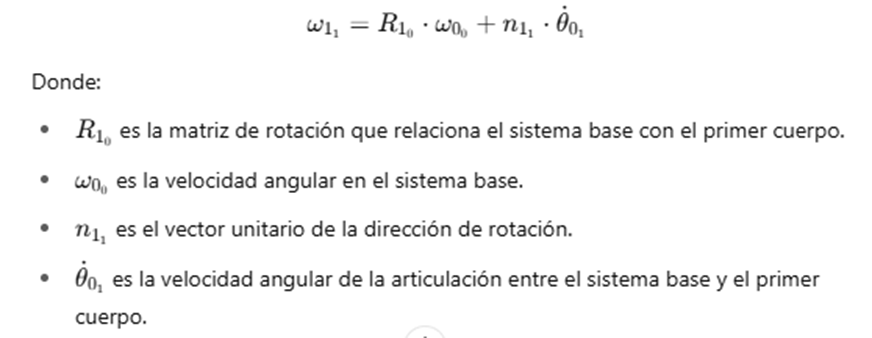

Donde 𝜔_1_1 es la velocidad angular del cuerpo 1 en su propio sistema de referencia, R_1_0 es la matriz de rotación entre el sistema de referencia global y el cuerpo 1, 𝜔_0_0 es la velocidad angular del sistema base (el sistema de referencia global), 𝑛_1_1 es el vector unitario que define la dirección de la rotación en el sistema del cuerpo 1, y 𝜃^dot_0_1 es la velocidad angular de la articulación entre el sistema base y el primer cuerpo.

Aplicando esta formula obtenemos lo siguiente:

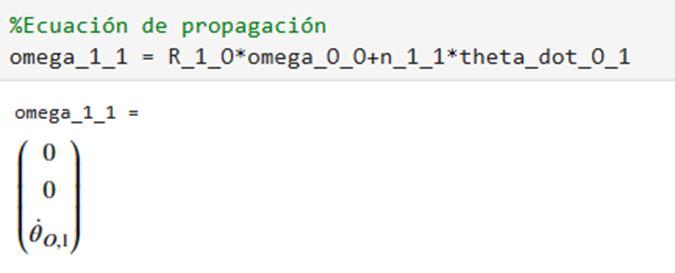

Posteriormente, para el segundo cuerpo, la ecuación de propagación es la siguiente:
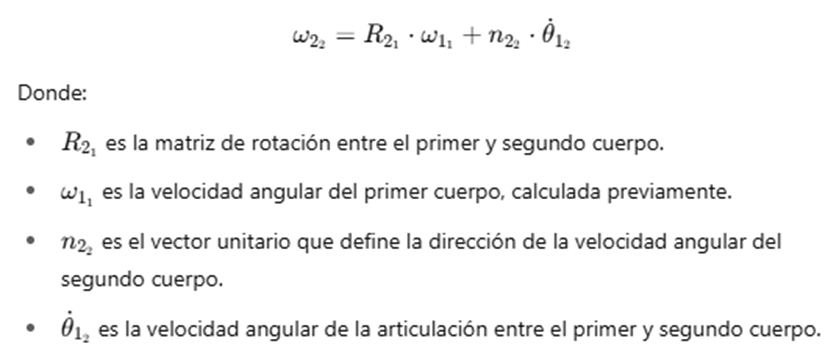
Aquí, 𝜔_2_2 representa la velocidad angular del segundo cuerpo en su propio sistema de referencia, R_2_1 es la matriz de rotación entre el primer y el segundo cuerpo, 𝜔_1_1 es la velocidad angular ya calculada para el primer cuerpo, y 
𝜃^dot_1_2 es la velocidad angular de la articulación entre los cuerpos 1 y 2.

Aplicando esta formula en matlab, obtenemos lo siguiente:
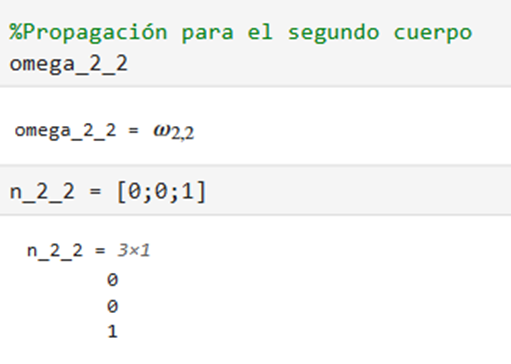
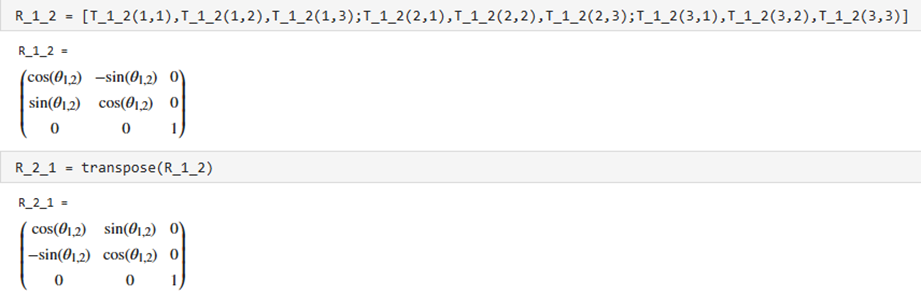
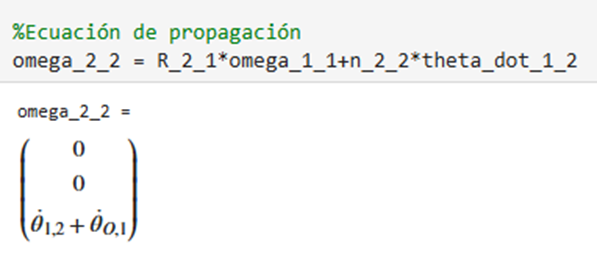



Finalmente, para el tercer cuerpo, la ecuación es:

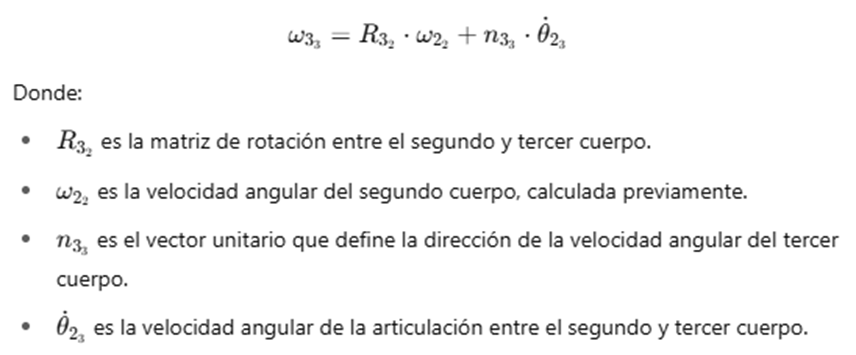

En esta ecuación, 𝜔_3_3 es la velocidad angular del tercer cuerpo, R_3_2 es la matriz de rotación entre el segundo y el tercer cuerpo, 𝜔_2_2 es la velocidad angular del segundo cuerpo, y 𝜃^dot_2_3 es la velocidad angular de la articulación entre los cuerpos 2 y 3.

Realizando los calculos en matlab, obtenemos lo siguiente
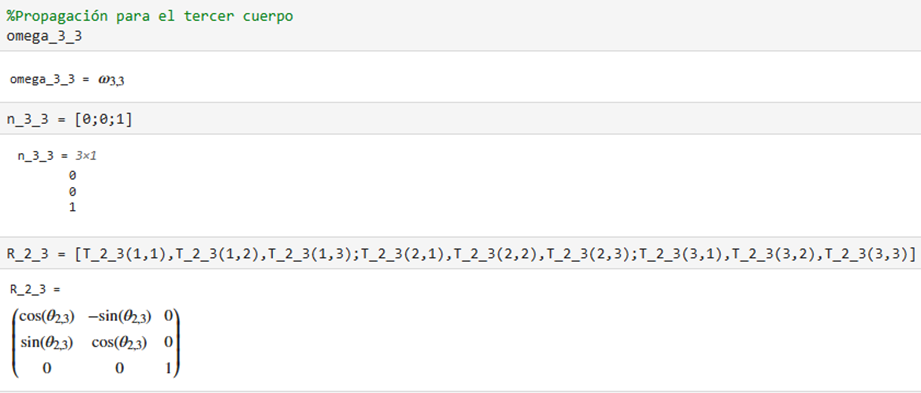
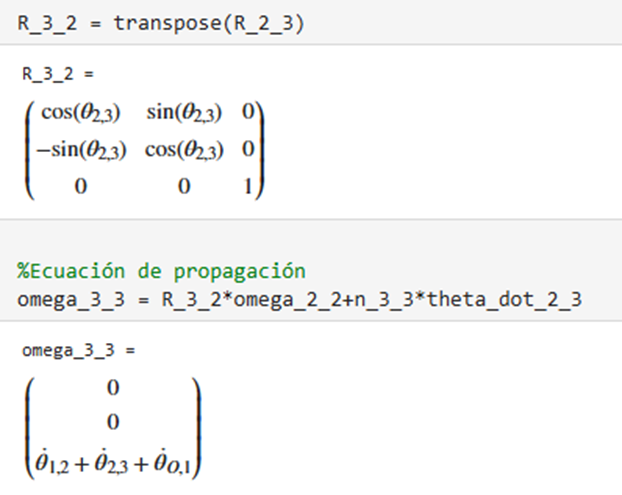

Posteriormente calculamos la velocidad lineal del centro de masa del tercer cuerpo, v_0_C3, en función de las velocidades angulares de los cuerpos anteriores. Esta ecuación describe el movimiento del tercer cuerpo en el sistema, tomando en cuenta las contribuciones de las velocidades angulares de los cuerpos anteriores, las longitudes de los eslabones y los ángulos de las articulaciones

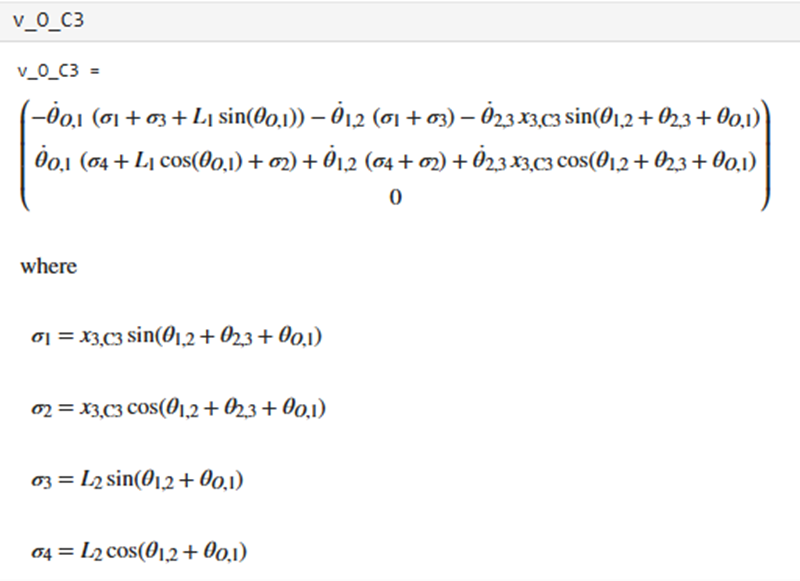



El cálculo de v_0_C3, es esencial para poder determinar la dinámica completa del sistema y poder utilizar estos resultados en aplicaciones prácticas como la simulación, el control o la optimización del sistema. Con esta información, ahora podemos proceder a realizar el análisis dinámico completo del sistema, utilizando las velocidades obtenidas para evaluar fuerzas, momentos y otros parámetros críticos.

## 5.4 Cálculo de los elementos de inercia
El cálculo de los elementos de inercia es fundamental para comprender cómo los cuerpos del sistema responden a las fuerzas rotacionales. Para cada cuerpo, se calculó el momento de inercia considerando su distribución de masa en relación con los ejes de rotación. Primero obtuvimos el vector de gravedad, que se utiliza para calcular la energía potencial de cada componente, ya que la posición de los centros de masa de los cuerpos está afectada por la fuerza gravitacional. Luego, calculamos la energía cinética de los cuerpos, que depende de las velocidades angulares y lineales de los centros de masa de cada cuerpo. La energía potencial se calculó utilizando la masa de los cuerpos y la altura de los centros de masa respecto al sistema de referencia, con la siguiente fórmula:

## 𝑈=𝑚𝑔ℎ

Donde 
𝑚: es la masa de cada cuerpo, 
𝑔: es la aceleración debida a la gravedad, y 
ℎ: es la altura de los centros de masa. 

Con estos valores, se obtuvo el lagrangeano, que es la diferencia entre la energía cinética y la energía potencial:

## 𝐿=𝑇−𝑈

En diferentes partes de los cálculos, se utlizo el lagrangeano, el cual nos permitió formular las ecuaciones de Lagrange, que se derivan para obtener las ecuaciones de movimiento del sistema. Estas ecuaciones son esenciales para entender cómo las fuerzas actúan sobre los cuerpos y cómo afectan su movimiento. De esta forma, los elementos de inercia fueron calculados, permitiendo integrar las fuerzas y torques en el modelo dinámico del sistema y proporcionando una base para la simulación y el control del robot. Sin este cálculo, no podríamos predecir cómo se moverían los cuerpos del sistema bajo la influencia de las fuerzas externas.

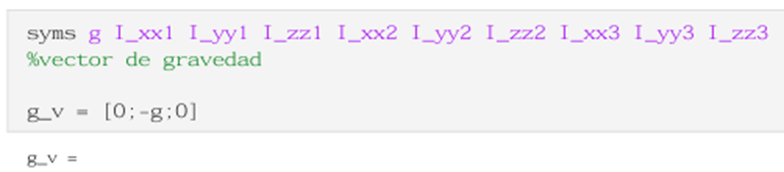
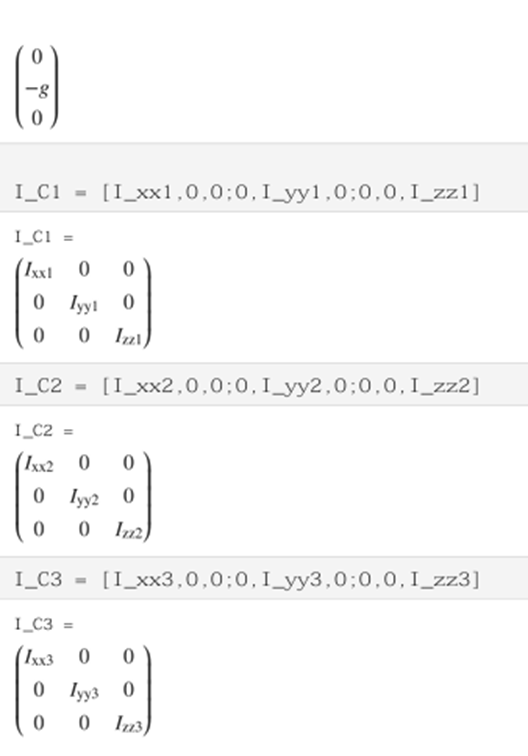
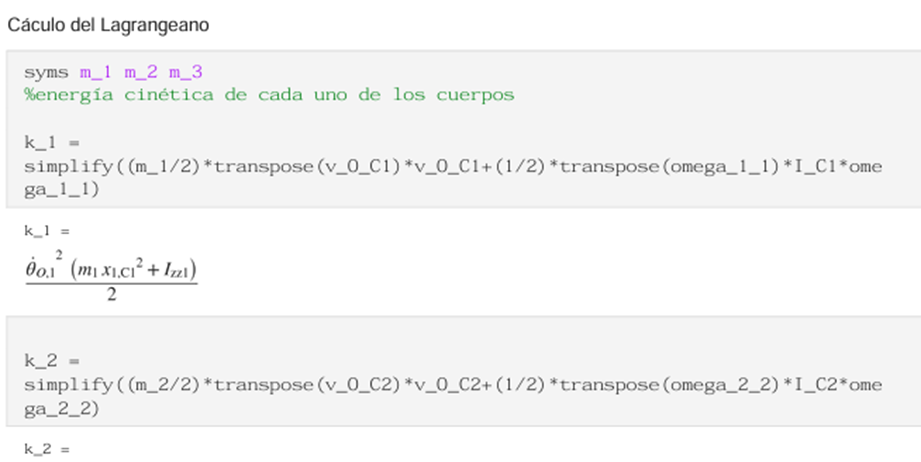
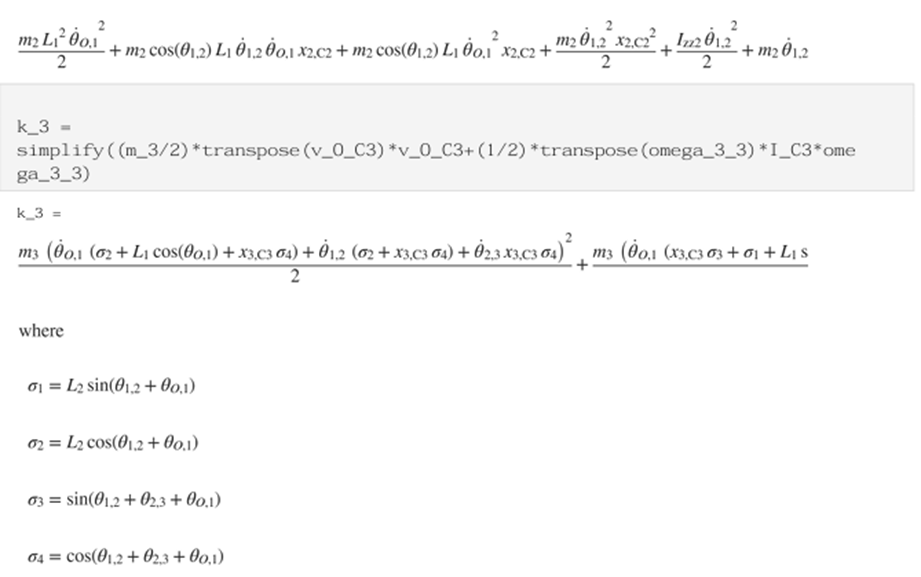
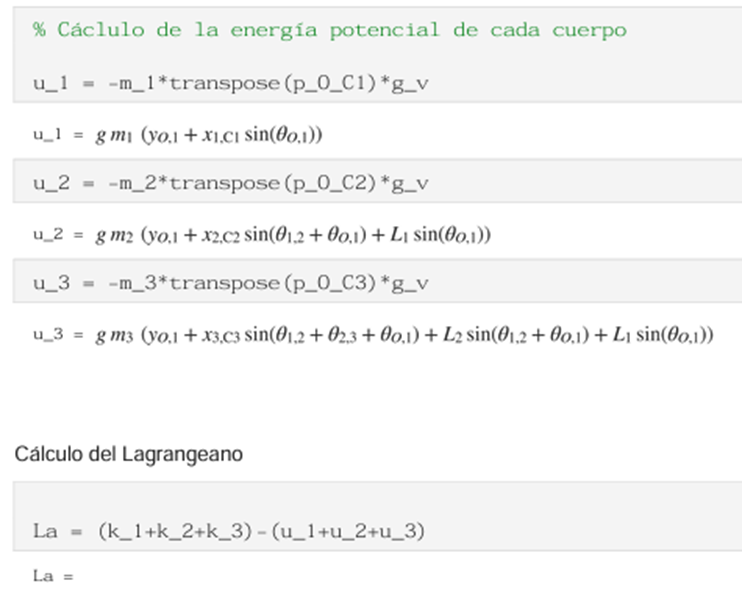
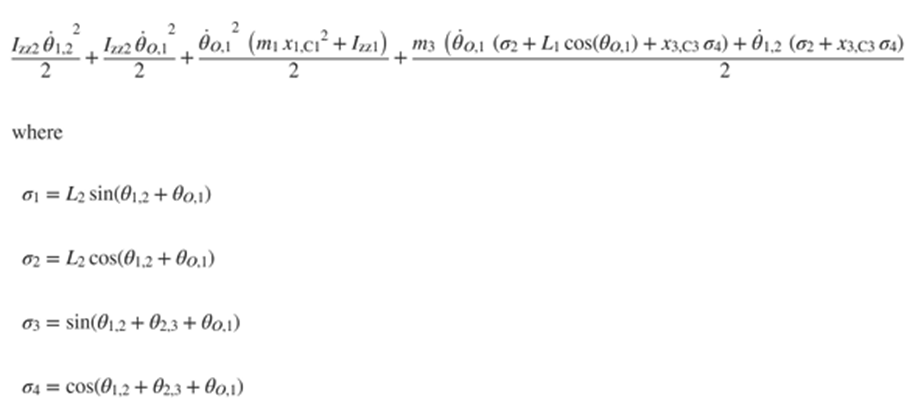


## 5.5 Cálculo de los pares (torques)

El cálculo de los pares o torques es esencial para entender cómo las fuerzas externas aplicadas a los cuerpos generan movimiento rotacional en el sistema. Los torques son calculados usando la fórmula 𝜏=𝑟×𝐹, donde 𝑟 es el vector de posición desde el eje de rotación hasta el punto de aplicación de la fuerza 𝐹. Se calculó la relación entre las fuerzas actuantes y las articulaciones, y se utilizó la matriz de inercia para obtener el momento de inercia de cada componente del sistema. La matriz de inercia describe cómo las fuerzas afectan a la rotación de un cuerpo, considerando su distribución de masa en relación con el eje de rotación. La relación entre las fuerzas y los torques es crucial para entender cómo se distribuyen los esfuerzos y cómo los cuerpos responden a los movimientos de las articulaciones. Estos cálculos permiten obtener las ecuaciones del movimiento para cada cuerpo, que son fundamentales para la simulación dinámica del sistema. Con los pares calculados, podemos determinar la cantidad de rotación que generarán las fuerzas aplicadas y ajustar los parámetros del sistema para optimizar su funcionamiento.

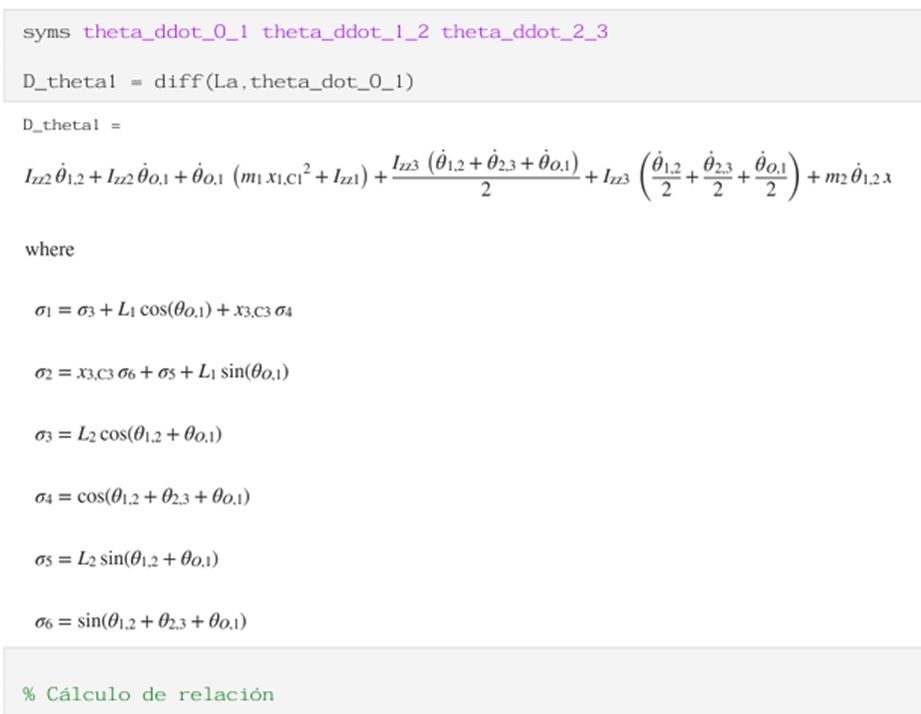
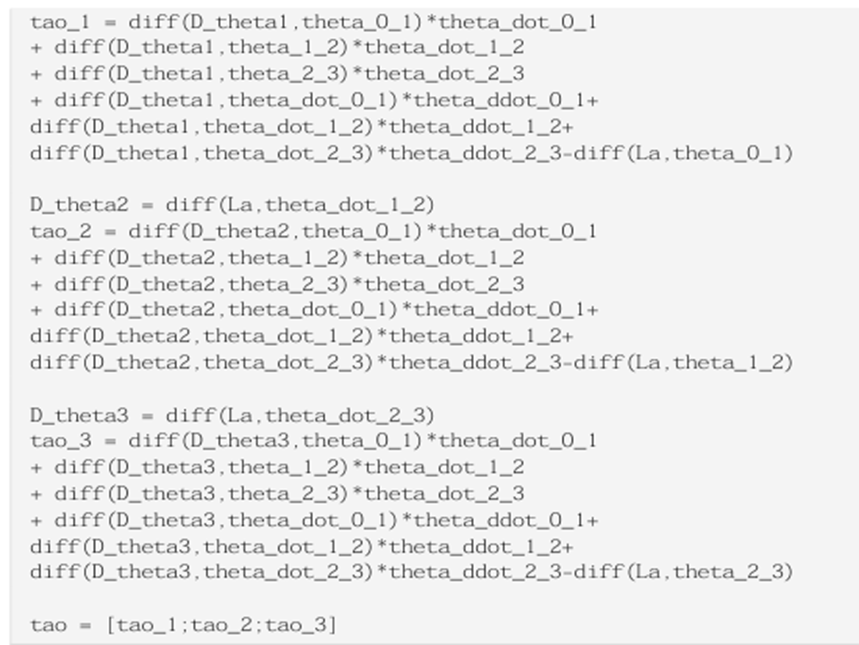
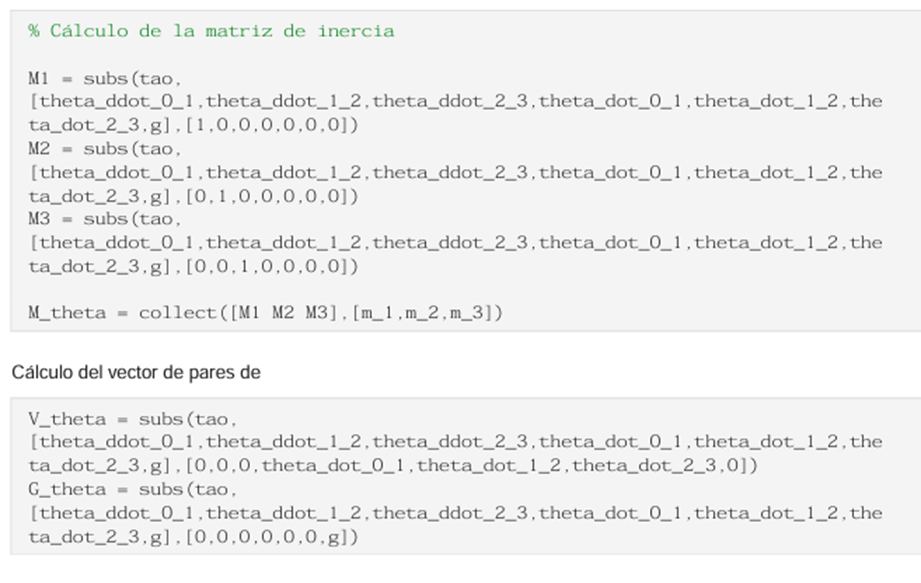

## 6. Conclusión

A lo largo de este trabajo, he aplicado una serie de conocimientos adquiridos en ingeniería mecatrónica para abordar problemas complejos de modelado cinemático y dinámico de un robot manipulador. En primer lugar, al identificar y plantear los problemas relacionados con el comportamiento del robot, utilicé fundamentos de las ciencias básicas y de la ingeniería aplicada, como las matemáticas y la física, para desarrollar modelos precisos que permiten predecir la postura, las velocidades y las aceleraciones del robot. Esta metodología es un claro ejemplo de cómo los conocimientos adquiridos se ponen en práctica para resolver problemas reales de la ingeniería mecatrónica.

Además, a lo largo del desarrollo de este proyecto, se aplicaron procesos de diseño de ingeniería al proponer modelos que no solo cumplen con los requerimientos técnicos, sino que también están orientados a contribuir al desarrollo de proyectos en el ámbito de la automatización y la robótica. El uso de matrices de transformación homogénea y el análisis cinemático de las velocidades y aceleraciones refuerzan la importancia de comprender cómo los componentes de un sistema interactúan entre sí, lo cual es esencial en el diseño de soluciones que satisfagan las necesidades de la ingeniería mecatrónica.

La capacidad de comunicar de manera clara y efectiva lo aprendido, tanto de forma oral como escrita, es fundamental en el ámbito profesional. En este trabajo, he tenido la oportunidad de estructurar y presentar de manera detallada el análisis realizado, permitiendo que se comprendan los procesos de modelado y sus aplicaciones en la robótica. Además, he aprendido a realizar juicios informados al considerar el impacto de las soluciones propuestas, evaluando no solo la viabilidad técnica, sino también los aspectos económicos, ambientales y sociales que pueden influir en la implementación de estas tecnologías.

